In [1]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [3]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, weight_init_std=weight_init_std, use_batchnorm=True)

    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = train_size / batch_size
    epoch_cnt = 0
    
    iter = 0
    while True:
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if iter % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                print("weight_init:{:.4f} | train_acc: {}, bn_train_acc: {}".format(weight_init_std, train_acc, bn_train_acc))
                break
            
        
        iter += 1

    return train_acc_list, bn_train_acc_list

In [4]:
weight_scale_list = np.logspace(0, -4, num=16)
train_acc_list = []
bn_train_acc_list = []
for w in weight_scale_list:
    t1, t2 = __train(w)
    train_acc_list.append(t1)
    bn_train_acc_list.append(t2)

weight_init:1.0000 | train_acc: 0.097, bn_train_acc: 0.345
weight_init:0.5412 | train_acc: 0.097, bn_train_acc: 0.481
weight_init:0.2929 | train_acc: 0.937, bn_train_acc: 0.632
weight_init:0.1585 | train_acc: 0.869, bn_train_acc: 0.772
weight_init:0.0858 | train_acc: 0.314, bn_train_acc: 0.883
weight_init:0.0464 | train_acc: 0.116, bn_train_acc: 0.955
weight_init:0.0251 | train_acc: 0.116, bn_train_acc: 0.992
weight_init:0.0136 | train_acc: 0.116, bn_train_acc: 0.998
weight_init:0.0074 | train_acc: 0.117, bn_train_acc: 1.0
weight_init:0.0040 | train_acc: 0.117, bn_train_acc: 0.999
weight_init:0.0022 | train_acc: 0.117, bn_train_acc: 0.993
weight_init:0.0012 | train_acc: 0.116, bn_train_acc: 0.796
weight_init:0.0006 | train_acc: 0.117, bn_train_acc: 0.652
weight_init:0.0003 | train_acc: 0.116, bn_train_acc: 0.615
weight_init:0.0002 | train_acc: 0.117, bn_train_acc: 0.522
weight_init:0.0001 | train_acc: 0.117, bn_train_acc: 0.599


In [5]:
def plot_graph():
    plt.figure(figsize=(16, 16))
    x = np.arange(max_epochs)

    for i, w in enumerate(weight_scale_list):
        train_acc = train_acc_list[i]
        bn_train_acc = bn_train_acc_list[i]
        plt.subplot(4, 4, i + 1)
        plt.title("W ~= {:.4f}".format(w))

        plt.plot(x, bn_train_acc, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc, linestyle="--", label='Normal(without BatchNorm)', markevery=2)

        plt.ylim(0, 1.0)
        if i % 4:
            plt.yticks([])
        else:
            plt.ylabel("accuracy")
        if i < 12:
            plt.xticks([])
        else:
            plt.xlabel("epochs")
        
        plt.legend(bbox_to_anchor=(1, 0), loc='lower right', fontsize=8)

    plt.show()

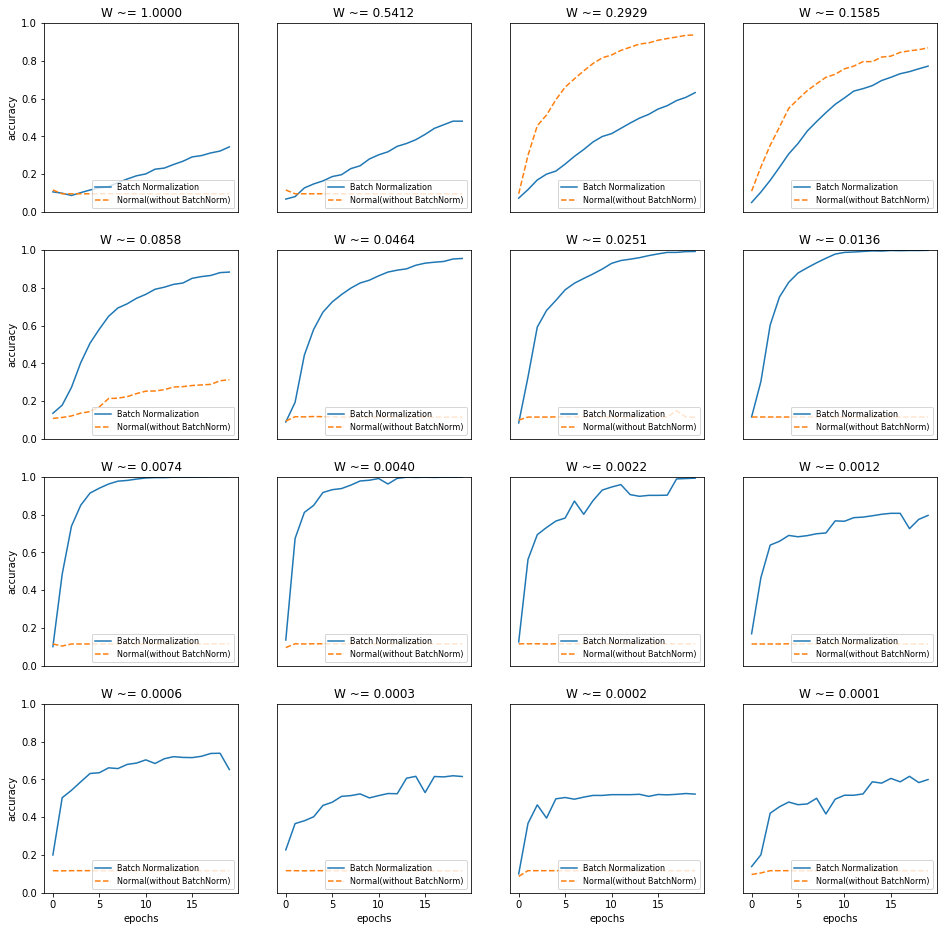

In [6]:
plot_graph()